# **Minor Project 5**

**Our Scope for the project is to find similarities and disimilarities between images and also use PCA to find their latent representation.**

For this purpose, we will be using a State-of-the-art(SOTA) pretrained model known as VGG16.
So basically we are doing a transfer learning that allows us to use this pre-existing model, trained on a huge dataset for our own classification task.

Let us understand **VGG16 CNN model Architecture** 


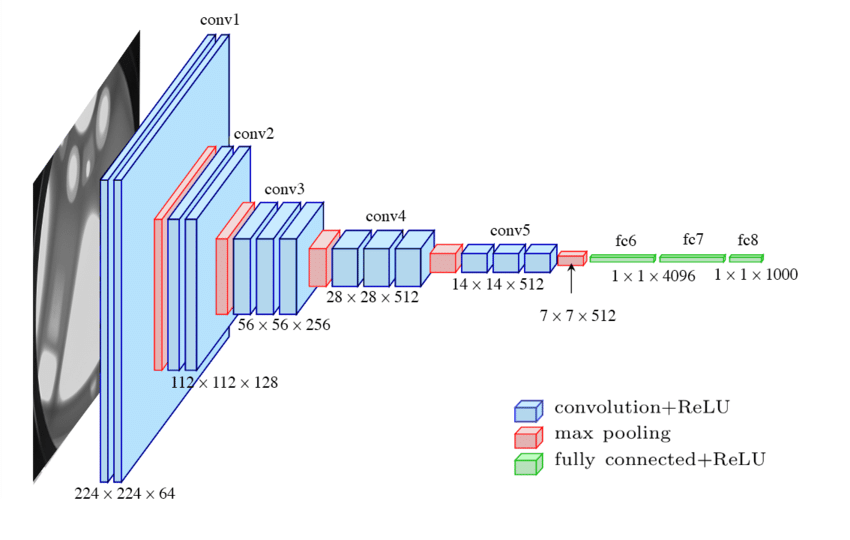


*   Input to 1st convolution layer is a fixed size 224*224 RGB image
*   The stack of convolution layers uses 3*3 kernel size filters.
*   Pooling done by live max-pooling layers
*   Then a stack of three fully connected(FC) layers
*   The Final FC layer is a Softmax layer which perform 1000 classification





**1. Import Necessary Libraries**

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

**2. Preprocessing and Loading**

We initially loaded the model and then viewed its summary to understand the architecture of the VGG16 model in a better way.

In [4]:
model = VGG16()
model.summary()

553476096/553467096 [==============================] - 18s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

Now we load the input image and and preprocess it:
target_size = (224,224) because the size of the loaded image must be same as the size that the 1st convolution layer accepts.

In [10]:
sample_size = 1
sample_dimension = 3

sample_height = 224
sample_width = 224

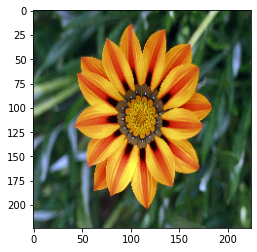

In [11]:
img = load_img('Flower_jtca001.jpg', target_size=(sample_height,sample_width))
plt.imshow(img)
plt.show()

Now we convert the image to tensor format so that machine is able to understand the image.

In [12]:
img = img_to_array(img)
img = img.reshape(sample_size, sample_height, sample_width, sample_dimension)

array([[[[ 36.,  59.,  41.],
         [ 35.,  57.,  36.],
         [ 29.,  55.,  30.],
         ...,
         [ 41.,  71.,  45.],
         [ 48.,  64.,  53.],
         [ 51.,  65.,  50.]],

        [[ 37.,  59.,  36.],
         [ 38.,  63.,  44.],
         [ 40.,  63.,  37.],
         ...,
         [ 44.,  70.,  43.],
         [ 48.,  67.,  47.],
         [ 40.,  63.,  43.]],

        [[ 47.,  75.,  60.],
         [ 46.,  74.,  51.],
         [ 43.,  71.,  48.],
         ...,
         [ 38.,  62.,  38.],
         [ 46.,  69.,  49.],
         [ 45.,  61.,  48.]],

        ...,

        [[ 53.,  84.,  69.],
         [ 52.,  88.,  74.],
         [ 41.,  81.,  70.],
         ...,
         [ 66., 108.,  58.],
         [ 53.,  94.,  54.],
         [ 43.,  83.,  46.]],

        [[ 56.,  82.,  69.],
         [ 60.,  87.,  80.],
         [ 47.,  83.,  79.],
         ...,
         [ 73., 105.,  58.],
         [ 51.,  89.,  50.],
         [ 42.,  75.,  44.]],

        [[ 56.,  86.,  74.],
       

In [14]:
result = model.predict(img)

array([[1.17639978e-08, 5.63955382e-07, 1.61678859e-09, 9.84839987e-10,
        2.69624278e-09, 3.08274508e-08, 3.81797491e-08, 2.40109301e-07,
        4.37717745e-07, 4.46179849e-09, 1.10656124e-07, 1.03755167e-06,
        9.16386512e-07, 2.17860020e-07, 2.11170900e-05, 5.64048196e-06,
        1.55629925e-06, 5.76488264e-06, 5.33997991e-06, 7.94679011e-07,
        2.19416137e-07, 3.21624242e-07, 1.75025168e-08, 9.16202509e-08,
        4.32288061e-06, 1.17901173e-07, 1.43113112e-07, 3.75232332e-07,
        1.03102821e-07, 1.17292034e-08, 6.27961640e-07, 6.85043801e-07,
        4.34019057e-07, 3.90882882e-08, 3.15198406e-07, 1.17860040e-07,
        6.08071832e-06, 3.13837546e-07, 2.28077269e-07, 2.12433005e-08,
        5.80507617e-07, 1.15680550e-07, 1.17815077e-07, 1.41609860e-06,
        3.96086079e-08, 2.09871995e-08, 1.56011686e-06, 3.24681110e-07,
        1.12973864e-09, 1.33511451e-08, 2.94045996e-08, 3.73202758e-09,
        4.06685530e-07, 6.36393509e-07, 4.93251946e-07, 6.613994

In [16]:
class_label = decode_predictions(result)

49152/35363 [=========================================] - 0s 0us/step


In [18]:
class_label[0]

[('n11939491', 'daisy', 0.93711936),
 ('n03476684', 'hair_slide', 0.029821068),
 ('n03944341', 'pinwheel', 0.008621703),
 ('n02206856', 'bee', 0.0065710857),
 ('n03991062', 'pot', 0.0038786158)]